<a href="https://colab.research.google.com/github/msaantonova/ADS_2024/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Tutorial2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 2: Introduction to Computational Linguistics

This is the first tutorial with practical exercises for the lecture *Introduction to Computational Linguistics* in the winter semester 2024. Hands-on exercises are marked with 👋 ⚒ and questions are marked with ❓.

## **Store this notebook**

Go to **File** and make sure you store this file as a local copy to either your GitHub or Google Drive. If you do not have a Google account and also do not want to create one, please check Option C below.


## Option A)  Google Drive

Go to the menu **File** and click on **Save a Copy in Drive**. The advantage of this option is that your changes in the notebook will be saved regularly. If you wish to move the file to a specific folder, click on **Move** and the select the corresponding folder in your Google Drive.


## Option B) GitHub


Go to the menu **File** and click on **Save a Copy in GitHub**, select the repository on your GitHub account to which you wish to push the Colab notebook. Note that this option does not automatically save changes in your Colab notebook.

## Option C) Download this notebook as ipynb (Jupyter notebook) or py (Python file)

To run this notebook as Jupyter notebook or Python file on your local machine, Python and NLTK need to be installed. Within the course of the semester several more local installations will be required.  

To run a Jupyter notebook the easiest option is to install [Anacadonda](https://www.anaconda.com/). A Python file can be run directly from the command line or in an Integrated Development Environment (IDE), such as [PyCharm](https://www.jetbrains.com/de-de/pycharm/).

-----------
## **Lesson 1: Morphological/Syntactic Analysis with NLP libraries**
Today we will look at three different Natural Language Processing (NLP) libraries to perform typical NLP steps. [StanfordNLP](http://stanza.run/), [Natural Language ToolKit (NLTK)](https://www.nltk.org/), and [spaCy](https://spacy.io/).

The fist step is to install the Stanza software library to make it available in our notebook. This is equivalent to installing a Python package on your computer via the command line or directly in PyCharm.  

In [ ]:
!pip install stanza
!pip install peft

NLTK and spaCy are already available in a standard Colab Notebook, however, we need to download some packages that we will need in NLTK.

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('gutenberg')

We also need to download the specific model for the specific language with spaCy.

In [ ]:
!python -m spacy download en_core_web_sm

## Tokenization and Part-of-Speech (POS) Tagging

Tokenization is the process of separating character sequences into smaller pieces, called tokens. In this process certain characters might be omitted, such as punctuation (depending on the tokenizer).

Part-of-Speech (POS) Tagging represents a process to classify and label each word by its part-of-speec, i.e., word class. Typical tag sets that are used for these labels are the [Penn Treebank tagset](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) and the Univrsal [POS Tags](https://universaldependencies.org/u/pos/).

The first library we will use is the traditional NLTK lirbary to tokenize and POS tag a sample sentence. The tagset that the Perceptron Tagger uses is the [Penn Treebank tagset](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html).

❓ After you run the following code cell, are the POS tags for the two different uses of *tears* correct? How does their pronunciation differ?


In [ ]:
# Tokenization
from nltk.tokenize import word_tokenize
# Part-of-Speech tagger
from nltk.tag.perceptron import PerceptronTagger

# Example sentences
example_sentence = "It just tears me apart to see you suffering like that and in tears."

# Initializing POS tagger
tagger = PerceptronTagger()

# Tokenize the sentence
print("Tokenized sentence: ", word_tokenize(example_sentence))

# POS tag each token in the tokenized sentence
pos_tags = tagger.tag(word_tokenize(example_sentence))
print("POS tags: ", pos_tags)

👋 ⚒ Try to do perform tokenization and POS tagging on the same example sentence using spaCy. Complement the code cell below by following the instructions in the [spaCy documentation](https://spacy.io/usage/linguistic-features).

❓ Are the POS tags and word classes identical to those of the NLTK output?

In [ ]:
import spacy

# Loading a specific spaCy model for a specific language
nlp = spacy.load("en_core_web_sm")

# Your code here

## Lemmatization
Lemmatization is the process of reducing words to their base forms. It allows to group identical words with different inflections in a corpus.



In [ ]:
# Lemmatizer
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

example_word = "mice"
lemmatized_word = lemmatizer.lemmatize(example_word)

print(f"The lemmatized version of  {example_word} is {lemmatized_word}.")
print("The lemmatized version of %s is %s" % (example_word,lemmatized_word))

With spaCy the code is very much the same for lemmatization as for tokenization and POS tagging, exemplified for our example sentence below.

In [ ]:
doc = nlp(example_word)
for token in doc:
    print(token.text, token.lemma_)

👋 ⚒ Lemmatize all word in the following list directly comparing the output of the WordNetLemmatizer and spaCy Lemmatizer. Which words are changed and which ones not and why? Are there any differences between the two NLP libraries?

In [ ]:
word_list = ['presumably', 'provisions', 'owed', 'abacus', 'flies', 'dies', 'mules',
        'seizing', 'caresses', 'sensational', 'colonizer', 'traditional', 'plotted']

# Your code here

## Stemming
Stemming is the process of reducing words to their stem.

In [ ]:
# Three different stemmers
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import SnowballStemmer

# Initializing stemmers
ps = PorterStemmer()
ls = LancasterStemmer()
ss = SnowballStemmer("english")

print(ps.stem(example_word))
print(ls.stem(example_word))
print(ss.stem(example_word))

👋 ⚒ Run the WordNet lemmatizer and the three stemmers above on the list `word_list` to directly compare the results. Which stemmer worked better in your view? Which method would you prefer to determine word frequency information of a text corpus?

In [ ]:
# Your code here

## Dependency Parsing

Dependency Parsing is the process of identifying direct binary grammatical relations between words/phrases in a sentence.

Whenever grammatical relations are needed, dependency parsing is very useful. The most common tagset are the [Universal Dependency Relations](https://universaldependencies.org/u/dep/).

We will start by looking at dependency parsing in spaCy.

👋 ⚒ When looking at the [spaCy documentation](https://spacy.io/usage/linguistic-features), how can you adapt the previous spaCy code to perfom dependency parsing on `example_sentence2`?  


In [ ]:
example_sentence2 = "Donald Trump, Elon Musk and CNN have cited election predictions from Polymarket, a betting site where crypto enthusiasts have wagered more than $100 million on who will win the presidency."

doc = nlp(example_sentence2)

# Your code here

spaCy offers this very simple and nice function to visualize dependency relations.

In [ ]:
# You can also visualize the dependency relations
from spacy import displacy
displacy.render(doc, style="dep", jupyter=True)

While there are some options for dependency parsing in NLTK, the successful ones depend on the StanfordNLP Parser. Thus, we will directly use StanfordNLP and run all the previous steps in the socalled pipeline.

First, we need to download the English model for StanfordNLP. You need to agree to download the model and specify a donwload directory, if preferred.

In [ ]:
import stanza
stanza.download("en")

Then we can run the library on the processing steps we are interested in.

👋 ⚒ Try to split the many code elements within the F-String statement in the `print` line into a multi-line code, starting with the first for-loop.




In [ ]:
pipeline = stanza.Pipeline(lang='en', processor='tokenize,pos,lemma,depparse')
doc = pipeline(example_sentence2)

print(*[f'id: {word.id}\tword: {word.text}\thead id: {word.head}\thead: {sent.words[word.head-1].text if word.head > 0 else "root"}\tdeprel: {word.deprel}' for sent in doc.sentences for word in sent.words], sep='\n')

❓ Do you notice any differences between the two types of dependency relations and the output for this sentence? Do the two parsers agree on the existing relations in this sentence?

----------
## **Lesson 2: Semantic Analysis with NLP libraries**

Python has several built-in types that are useful for storing and manipulating data: list, tuple, dict. Here is the official Python documentation on these types (and many others): https://docs.python.org/3/library/stdtypes.html.


## Named Entity Recognition (NER)

NER is a subtaks of information extraction that locates and classifies named entities, i.e., i.e., a real-world object that can be denoted with a proper name - person, organization, location, products, etc.

With NLTK, NER requires a number of preprocessing steps. Thus, we will only look at spaCy for right now.

❓ Which words/phrases of the `example_sentence2`do you consider named entities? When you run the code cell below, does the spaCy output differ from the NE list you identified?

In [ ]:
doc = nlp(example_sentence2)

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

👋 ⚒ Does the performance on NER with spaCy change if you lowercase all words in the sentence using the function `lower()`?

In [ ]:
# Your code here

👋 ⚒ Use the displacy library of spaCy to visualize the named entities in `example_sentence2`.

In [ ]:
from spacy import displacy

# Your code here

## Coreference Resolution

Coreference resolution is the task of identifying all expressions (mentions) in a text that refer to the same real-world entity, such as "“She has not told her friend about that story because it is too embarrassing for her.”
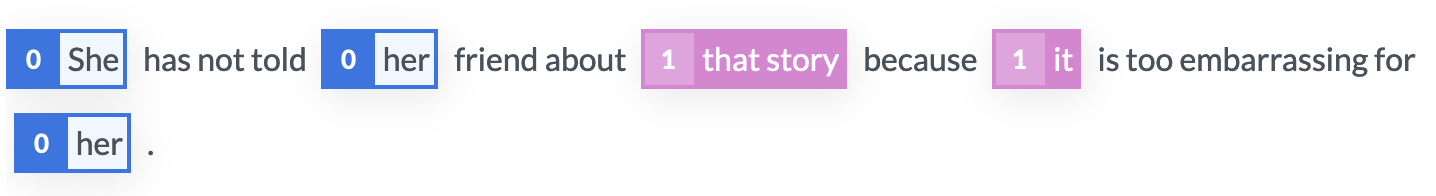

We will now try how well Stanza performs on this task.

❓ Do you consider the references correctly resolved in the following output? Which language model does the default Standard `coref` process use?

In [ ]:
import stanza
pipeline = stanza.Pipeline("en", processors="tokenize,coref")
example_sentence3 = "She has not told her friend about that story because it is too embarrassing for her."

print(pipeline(example_sentence3))

👋 ⚒ Adapt one of the [Winograd Schema examples](https://cs.nyu.edu/~davise/papers/WinogradSchemas/WSCollection.html) to see how well Stanza is able to resolve the coreferences.  

In [ ]:
# Your code here

# Bonus Exercise
Compare the performance of Stanza on the Winograd Schema example of your choice to that of the [Coference Resolution plugin](https://github.com/richardpaulhudson/coreferee#getting-started) in spaCy.

In [ ]:
!python -m spacy download en_core_web_trf
!python -m spacy download en_core_web_lg
!pip install coreferee
!python -m coreferee install en

In [ ]:
import coreferee, spacy
nlp = spacy.load('en_core_web_trf')
nlp.add_pipe('coreferee')
doc = nlp('Although he was very busy with his work, Peter had had enough of it. He and his wife decided they needed a holiday. They travelled to Spain because they loved the country very much.')
doc._.coref_chains.print()